<a href="https://colab.research.google.com/github/kozz84/particle_analysis/blob/main/Size_distribution_100Hz_SpectralClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [571]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [572]:
df = pd.read_csv('/content/drive/MyDrive/CIOP/size distrubution_100Hz.csv',sep=';')
df.dropna(inplace=True)
df.head(2)

,,Label,Area,Perim.,Major,Minor,Angle,Circ.,Feret,FeretX,FeretY,FeretAngle,MinFeret,AR,Round,Solidity,Group,AR2,Equivalent Diameter,Circ sqrt
0,169,210902_#4_100_30_1um_i002.tif:0124-0106,2977.920,438.884,94.390,40.169,85.995,0.194,113.371,102.0,147.0,79.919,53.536,2.350,0.426,0.654,0,0.472220,61.576014,0.44077
1,169,210902_#5_100_20_1um_i005.tif:0539-2012,2682.589,467.197,67.979,50.245,9.165,0.154,109.253,1990.0,535.0,177.397,74.108,1.353,0.739,0.476,0,0.678315,58.442950,0.39299


In [573]:
df_kcluster = df[['Perim.', 'Equivalent Diameter','Circ sqrt','Solidity', 'AR2' ,'Area']].copy()
df_kcluster.head(2)

,Perim.,Equivalent Diameter,Circ sqrt,Solidity,AR2,Area
0,438.884,61.576014,0.44077,0.654,0.472220,2977.920
1,467.197,58.442950,0.39299,0.476,0.678315,2682.589


In [574]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_kcluster)
df_kcluster_scaled = scaler.transform(df_kcluster)
df_kcluster_scaled = pd.DataFrame(df_kcluster_scaled, columns = df_kcluster.columns)
df_kcluster_scaled.head(2)

,Perim.,Equivalent Diameter,Circ sqrt,Solidity,AR2,Area
0,0.210848,0.285075,0.311416,0.495677,0.376402,0.098100
1,0.225358,0.268280,0.251960,0.239193,0.661452,0.088187


In [575]:
df_kcluster_scaled = pd.DataFrame(df_kcluster_scaled, columns = df_kcluster.columns)
df_kcluster_scaled.head(2)

,Perim.,Equivalent Diameter,Circ sqrt,Solidity,AR2,Area
0,0.210848,0.285075,0.311416,0.495677,0.376402,0.098100
1,0.225358,0.268280,0.251960,0.239193,0.661452,0.088187


In [576]:
from sklearn.cluster import SpectralClustering

In [577]:
model = SpectralClustering(n_clusters=2,
                            affinity='nearest_neighbors',
                            assign_labels='kmeans',
                            random_state=466)
model.fit(df_kcluster_scaled)

SpectralClustering(affinity='nearest_neighbors', n_clusters=2, random_state=466)

In [578]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
model.labels_[model.labels_ == 2] = 1
print(confusion_matrix(df['Group'],model.labels_))
print(round(accuracy_score(df['Group'],model.labels_),2))

[[534  47]
 [  2 561]]
0.96


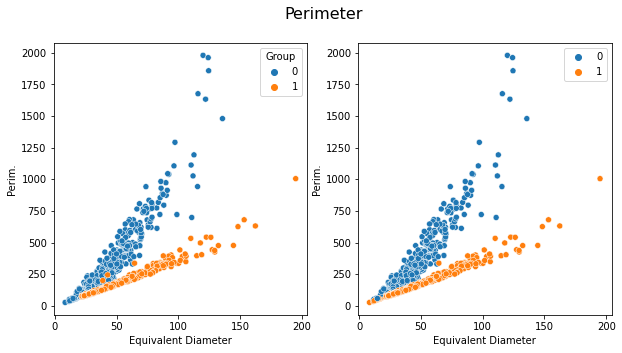

In [579]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(10,5))
fig.suptitle('Perimeter', fontsize=16)
sns.scatterplot(data=df, y='Perim.',x='Equivalent Diameter', hue='Group',ax=ax1)
sns.scatterplot(data=df_kcluster, y='Perim.',x='Equivalent Diameter', hue=model.labels_,ax=ax2)

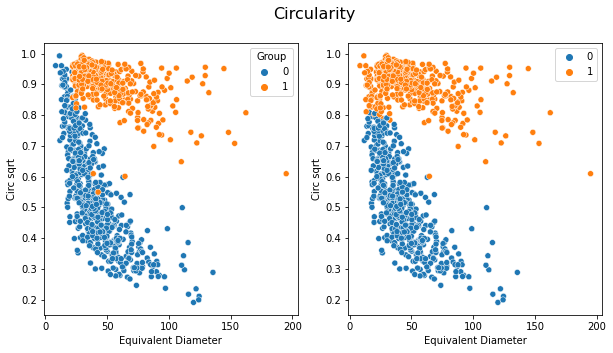

In [580]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(10,5))
fig.suptitle('Circularity', fontsize=16)
sns.scatterplot(data=df, y='Circ sqrt',x='Equivalent Diameter', hue='Group',ax=ax1)
sns.scatterplot(data=df_kcluster, y='Circ sqrt',x='Equivalent Diameter', hue=model.labels_,ax=ax2)

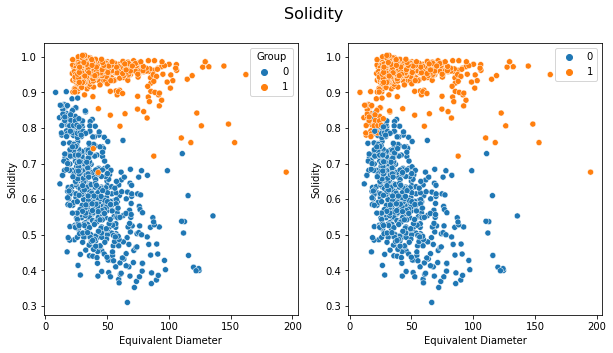

In [581]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(10,5))
fig.suptitle('Solidity', fontsize=16)
sns.scatterplot(data=df, y='Solidity',x='Equivalent Diameter', hue='Group',ax=ax1)
sns.scatterplot(data=df_kcluster, y='Solidity',x='Equivalent Diameter', hue=model.labels_,ax=ax2)